In [1]:
#2. Time wrt number of parameters

import numpy as np
import time
from SALib.sample import morris

p = 4
n_tra = 1

start = 400
end = 20000
step = 400

num_vars = np.arange(start, end, step)
t = np.zeros(int((end-start)/step))

i = 0
for n_vars in num_vars:
    names = [str(i) for i in range(n_vars)]
    bounds = np.array([np.zeros(n_vars),np.ones(n_vars)]).T

    problem = {
        'num_vars':   n_vars,
        'num_levels': p,
        'names':      names,
        'bounds':     bounds,
    }
    t1 = time.time()
    samples = morris.sample(problem, n_tra, num_levels=p)  
    t2 = time.time()
    t[i] = t2-t1
    i += 1
    print(i)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


/Users/akim/miniconda3/envs/salib-dev/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


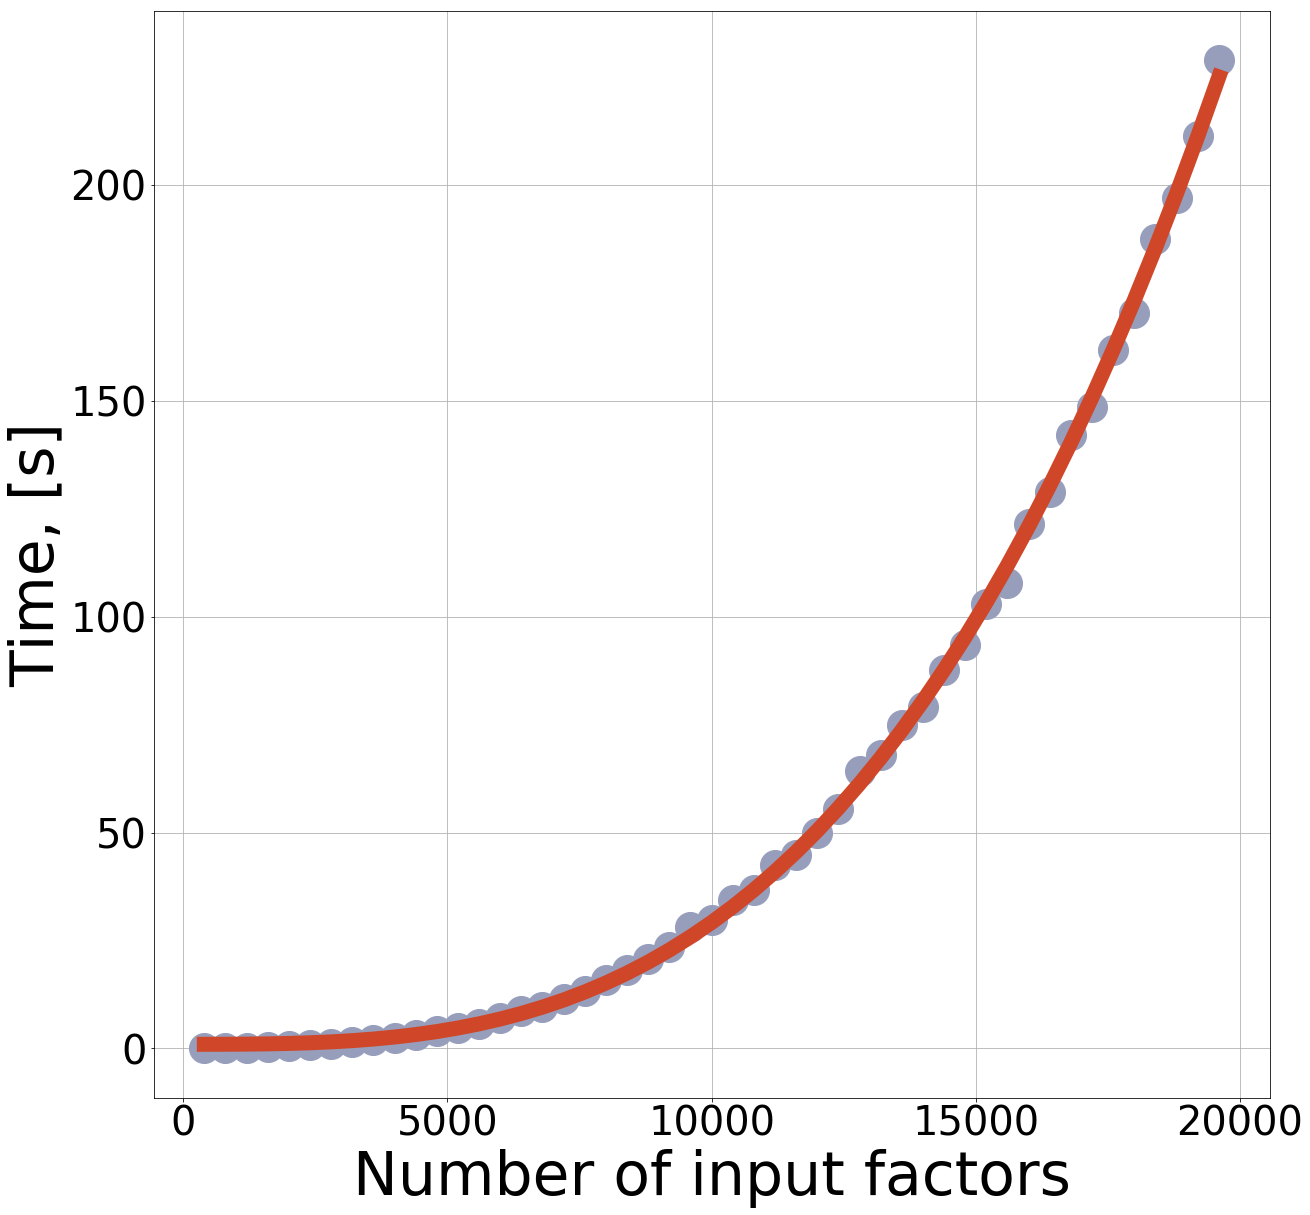

In [9]:
#Fit line
from scipy.optimize import curve_fit

def f(x, A, B, C, D): # this is your 'straight line' y=f(x)
    return A*x**B + C

A,B,C,D = curve_fit(f, num_vars, t)[0] 


mycolor1 = (152/256,159/256,189/256)
mycolor2 = (208/256,71/256,40/256)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(num_vars,t,'o',color=mycolor1,markersize=30)
plt.plot(num_vars,f(num_vars,A,B,C,D),color=mycolor2,lw=15)

plt.tick_params(axis='x',which='both',labelsize=40)
plt.tick_params(axis='y',which='both',labelsize=40)
plt.xlabel('Number of input factors',fontsize=60)
plt.ylabel('Time, [s]',fontsize=60)
plt.grid(True)
plt.locator_params(axis='x',nbins=6)

plt.show()

In [8]:
A,B,C

(1.362019255074308e-11, 3.0790575182548627, 0.9694477308283936)